<a href="https://colab.research.google.com/github/VibroGuard/Anomaly-Detection/blob/main/AutoEncoder-Method/Model-1/Model_X_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model

[[-0.64]
 [-0.67]
 [-0.66]
 ...
 [-0.63]
 [-0.7 ]
 [-0.67]]


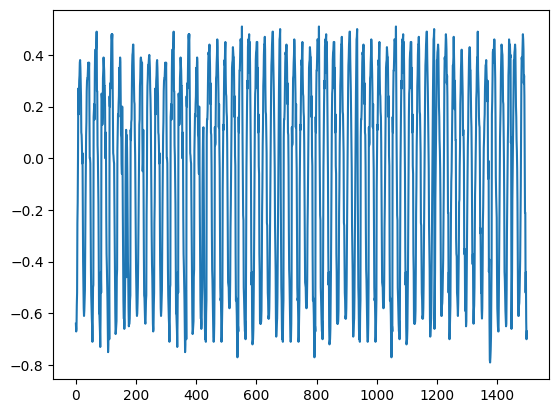

In [2]:
a = 7000  # 4000
b = 8500  # :

with open("x_data.txt", "rt") as x_data_file:
  line = x_data_file.readline()
  x_data = np.array(list(map(float, line.split()))).reshape(-1, 1)[a : b]
  print(x_data)

  plt.plot(x_data)

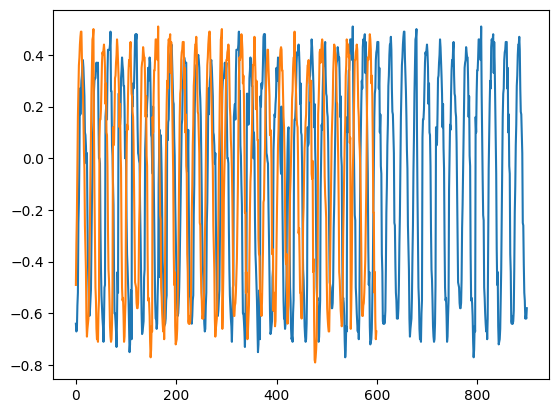

In [3]:
# Divide into train and test datasets.
train_ratio = 0.6

Xtrain = x_data[:int(train_ratio * x_data.size)]
Xtest = x_data[int(train_ratio * x_data.size):]

plt.plot(Xtrain)
plt.plot(Xtest)

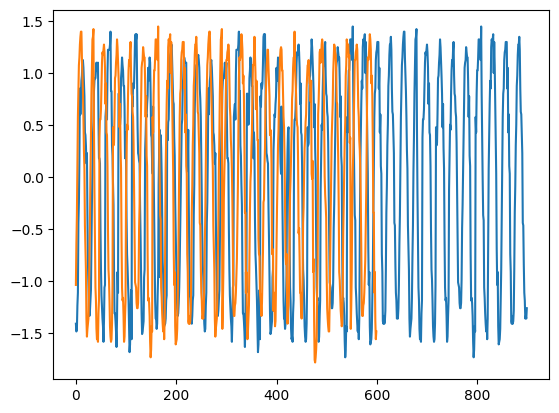

In [4]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized.
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

plt.plot(Xtrain)
plt.plot(Xtest)

In [5]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
#In this example, the n_features is 2. We will make timesteps = 3.
#With this, the resultant n_samples is 5 (as the input data has 9 rows).

seq_size = 30  # Number of time steps to look back
#Larger sequences (look further back) may improve forecasting.


def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(x.size - seq_size):
        #print(i)
        x_values.append(x[i:(i+seq_size)])
        y_values.append(y[i+seq_size])

    return np.array(x_values), np.array(y_values)

In [6]:
trainX, trainY = to_sequences(Xtrain, Xtrain, seq_size)
testX, testY = to_sequences(Xtest, Xtest, seq_size)

In [7]:
print(Xtrain.shape)
print(Xtest.shape)

print(trainX.shape)
print(trainY.shape)

# print(trainX[:2])

# plt.plot(trainX)
# plt.plot(trainY)

(900, 1)
(600, 1)
(870, 30, 1)
(870, 1)


In [8]:
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(trainX.shape[1]))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVecto  (None, 30, 128)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDist  (None, 30, 1)             129       
 ributed)                                               

In [9]:
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
25/25 [==============================] - 8s 154ms/step - loss: 0.4392 - val_loss: 0.2143
Epoch 2/10
25/25 [==============================] - 2s 79ms/step - loss: 0.2566 - val_loss: 0.1703
Epoch 3/10
25/25 [==============================] - 2s 79ms/step - loss: 0.2367 - val_loss: 0.1563
Epoch 4/10
25/25 [==============================] - 2s 79ms/step - loss: 0.2239 - val_loss: 0.1664
Epoch 5/10
25/25 [==============================] - 2s 78ms/step - loss: 0.2205 - val_loss: 0.1736
Epoch 6/10
25/25 [==============================] - 3s 128ms/step - loss: 0.2192 - val_loss: 0.1548
Epoch 7/10
25/25 [==============================] - 2s 79ms/step - loss: 0.2097 - val_loss: 0.1552
Epoch 8/10
25/25 [==============================] - 2s 80ms/step - loss: 0.2073 - val_loss: 0.1679
Epoch 9/10
25/25 [==============================] - 2s 81ms/step - loss: 0.2098 - val_loss: 0.1323
Epoch 10/10
25/25 [==============================] - 2s 80ms/step - loss: 0.1996 - val_loss: 0.1422


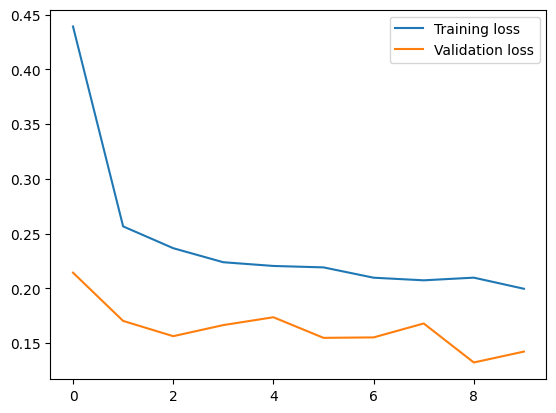

In [10]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

28/28 [==============================] - 2s 25ms/step


(array([ 2.,  1.,  5., 17., 17., 43., 58., 48., 74., 87., 67., 81., 41.,
        55., 42., 16., 41., 28., 25., 46., 32., 13., 10.,  8.,  2.,  4.,
         1.,  3.,  1.,  2.]),
 array([0.62042422, 0.65383322, 0.68724223, 0.72065124, 0.75406025,
        0.78746925, 0.82087826, 0.85428727, 0.88769627, 0.92110528,
        0.95451429, 0.98792329, 1.0213323 , 1.05474131, 1.08815031,
        1.12155932, 1.15496833, 1.18837733, 1.22178634, 1.25519535,
        1.28860435, 1.32201336, 1.35542237, 1.38883137, 1.42224038,
        1.45564939, 1.4890584 , 1.5224674 , 1.55587641, 1.58928542,
        1.62269442]),
 <BarContainer object of 30 artists>)

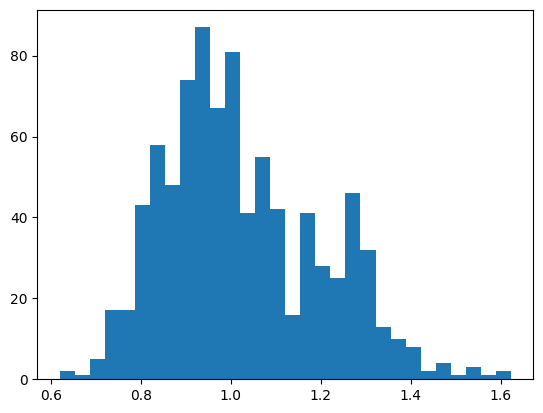

In [11]:
#Anomaly is where reconstruction error is large.
#We can define this value beyond which we call anomaly.
#Let us look at MAE in training prediction

trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)

18/18 [==============================] - 0s 25ms/step


(array([ 2.,  2.,  3., 10., 21., 38., 50., 39., 58., 56., 55., 33., 36.,
        25., 21., 31., 15., 18., 20., 10.,  8.,  6.,  3.,  0.,  3.,  1.,
         0.,  3.,  1.,  2.]),
 array([0.61661118, 0.65359657, 0.69058195, 0.72756734, 0.76455273,
        0.80153811, 0.8385235 , 0.87550889, 0.91249428, 0.94947966,
        0.98646505, 1.02345044, 1.06043582, 1.09742121, 1.1344066 ,
        1.17139199, 1.20837737, 1.24536276, 1.28234815, 1.31933353,
        1.35631892, 1.39330431, 1.4302897 , 1.46727508, 1.50426047,
        1.54124586, 1.57823124, 1.61521663, 1.65220202, 1.68918741,
        1.72617279]),
 <BarContainer object of 30 artists>)

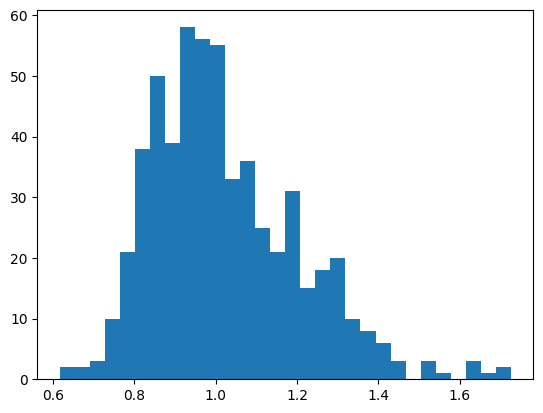

In [12]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)

In [25]:
max_trainMAE = 1.5 #or Define 90% value of max as threshold.

In [26]:
print(trainMAE.shape)
print(testMAE.shape)

(870, 1)
(570, 1)


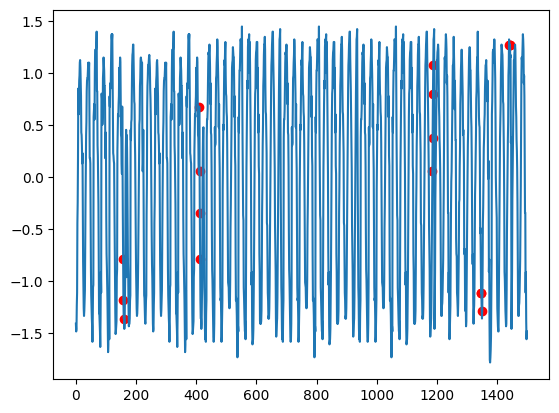

In [27]:
train_anomaly_indices = np.asarray(trainMAE > max_trainMAE).nonzero()[0]
test_anomaly_indices = np.asarray(testMAE > max_trainMAE).nonzero()[0]

anomaly_indices = np.concatenate((train_anomaly_indices.reshape(-1, 1), test_anomaly_indices.reshape(-1, 1) + int(train_ratio * x_data.size)))
anomaly_values = np.concatenate((Xtrain[train_anomaly_indices], Xtest[test_anomaly_indices]))

plt.plot(np.concatenate((Xtrain, Xtest)))
plt.scatter(anomaly_indices, anomaly_values, c="r")

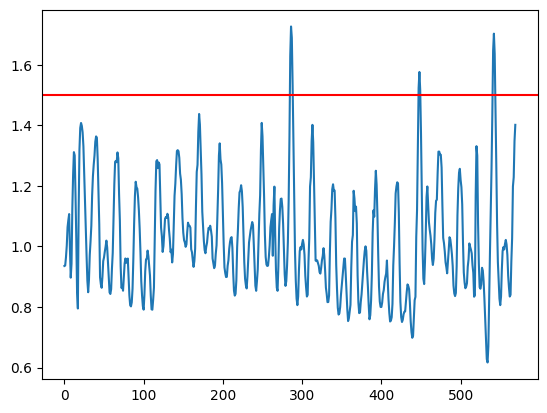

In [31]:
a = 0
b = 1500

plt.plot(testMAE[a: b])
plt.axhline(y = max_trainMAE, color = 'r', linestyle = '-')